# ECG Data Visualization (Milliseconds Scale)
This notebook loads synthetic ECG data with time in milliseconds and creates plots:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Load ECG Data

In [11]:
from google.colab import files

# Upload the CSV file manually
uploaded = files.upload()  # This will prompt you to upload `synthetic_ecg_milliseconds.csv`


Saving synthetic_ecg_milliseconds.csv to synthetic_ecg_milliseconds (1).csv


In [12]:
# Load ECG data with time in milliseconds
ecg_df = pd.read_csv('synthetic_ecg_milliseconds.csv')  # Adjust path if needed
time_ms = ecg_df['time_ms'].values
ecg_mV = ecg_df['ecg_mV'].values

In [13]:
# Show first 10 rows of the ECG data
print("📄 Sample of ECG data:")
display(ecg_df.head(10))


📄 Sample of ECG data:


,time_ms,ecg_mV
0,0.000000,0.000045
1,2.000400,0.000067
2,4.000800,0.000099
3,6.001200,0.000145
4,8.001600,0.000211
5,10.002000,0.000304
6,12.002400,0.000434
7,14.002801,0.000614
8,16.003201,0.000863
9,18.003601,0.001202


## Detect R-peaks

In [14]:
fs = 500  # sampling frequency in Hz
peaks, _ = find_peaks(ecg_mV, height=1.0, distance=fs * 0.6)
r_peak_times_ms = time_ms[peaks]

## Plot Full ECG Signal with R-peaks

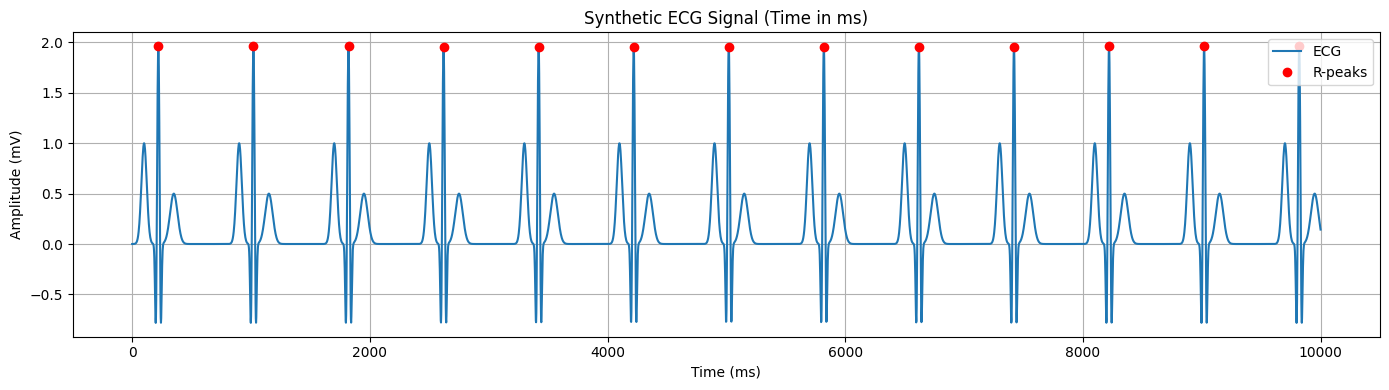

In [15]:
plt.figure(figsize=(14, 4))
plt.plot(time_ms, ecg_mV, label='ECG')
plt.plot(r_peak_times_ms, ecg_mV[peaks], 'ro', label='R-peaks')
plt.title('Synthetic ECG Signal (Time in ms)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Zoomed-in View of One Heartbeat

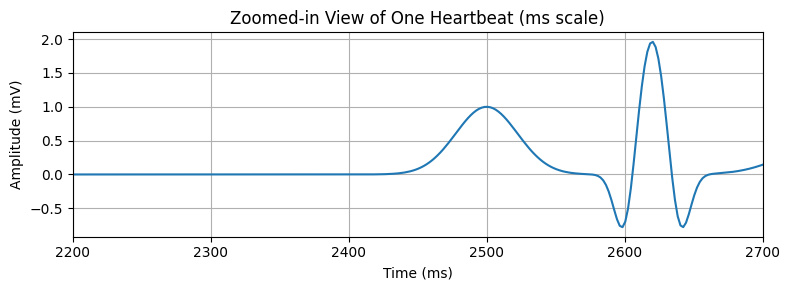

In [16]:
plt.figure(figsize=(8, 3))
plt.plot(time_ms, ecg_mV)
plt.xlim(2200, 2700)
plt.title('Zoomed-in View of One Heartbeat (ms scale)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Heart Rate Over Time

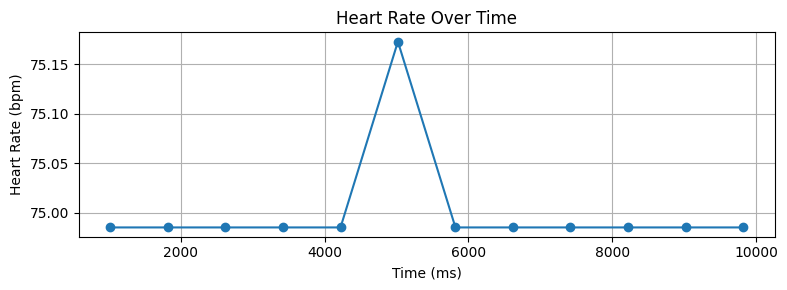

In [17]:
rr_intervals_s = np.diff(r_peak_times_ms) / 1000.0
heart_rate_bpm = 60 / rr_intervals_s
hr_time_ms = r_peak_times_ms[1:]

plt.figure(figsize=(8, 3))
plt.plot(hr_time_ms, heart_rate_bpm, marker='o')
plt.title('Heart Rate Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()